<a href="https://colab.research.google.com/github/yuraoh12/AI-bigdata/blob/main/231116_Yolov8_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Yolov8 github : https://github.com/ultralytics/ultralytics.git
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 18046, done.
remote: Counting objects: 100% (958/958), done.
remote: Compressing objects: 100% (574/574), done.
remote: Total 18046 (delta 547), reused 626 (delta 363), pack-reused 17088
Receiving objects: 100% (18046/18046), 9.91 MiB | 15.12 MiB/s, done.
Resolving deltas: 100% (12508/12508), done.


In [ ]:
cd ultralytics

/content/ultralytics


In [ ]:
!pwd

/content/ultralytics


In [ ]:
!pip install ultralytics
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.3/645.3 kB 12.2 MB/s eta 0:00:00


In [ ]:
!yolo predict
# root 경로에 yolov8n.pt 다운된 것 확인

WARNING ⚠️ 'model' is missing. Using default 'model=yolov8n.pt'.
100% 6.23M/6.23M [00:00<00:00, 93.7MB/s]
WARNING ⚠️ 'source' is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 92.4ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 63.0ms
Speed: 7.4ms preprocess, 77.7ms inference, 17.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


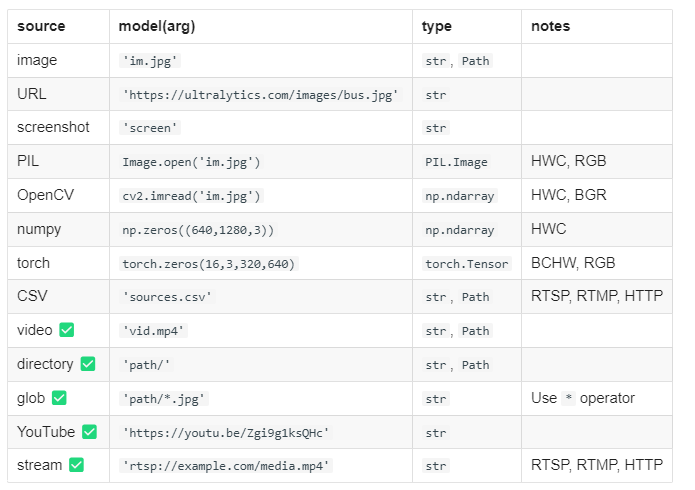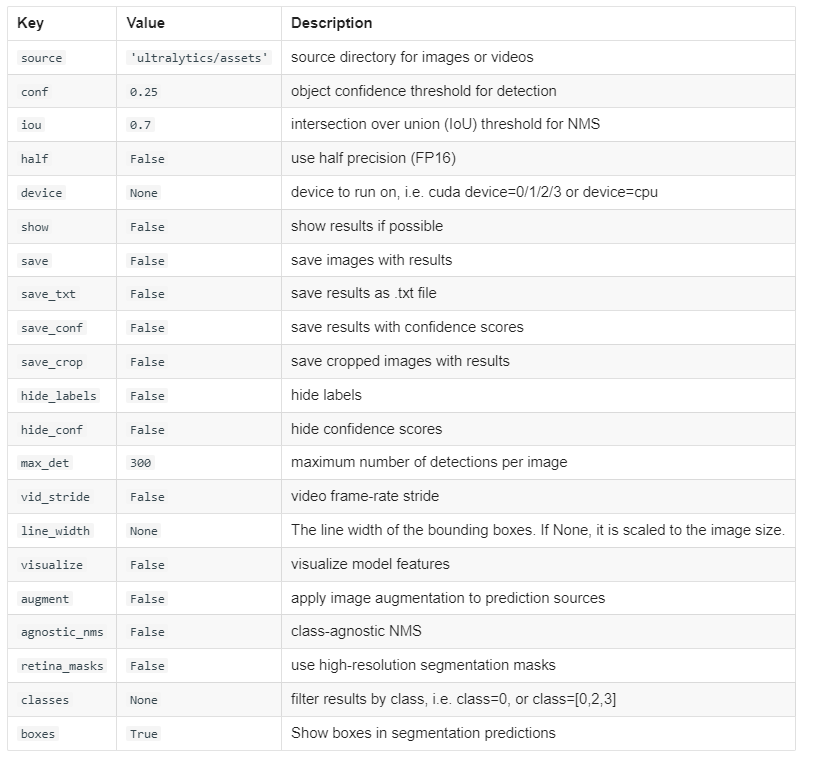

- YOLO 좌표 체계

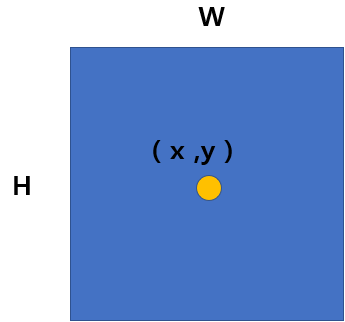

- yaml 파일 경로 : ultralytics\ultralytics\cfg\datasets

In [ ]:
# 데이터셋 다운로드
!pwd
!curl -L "https://public.roboflow.com/ds/BmWPTDR9Pw?key=pEp5UYSYge" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
# train 폴더와 test 폴더 생성 확인
!pwd
from glob import glob

train_img_list = glob('/content/ultralytics/train/images/*.jpg')
train_txt_list = glob('/content/ultralytics/train/labels/*.txt')
test_img_list = glob('/content/ultralytics/test/images/*.jpg')
test_txt_list = glob('/content/ultralytics/test/labels/*.txt')

print(len(train_img_list), len(test_img_list))
print(len(test_txt_list), len(test_img_list))

/content/ultralytics
5269 1766
1766 1766


In [ ]:
# train 데이터와 val 데이터 나누기
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(train_img_list, test_size=0.2, random_state=2000)

print(len(train_img_list), len(val_img_list))

4215 1054


In [ ]:
# 파일 쓰기
with open('/content/ultralytics/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/ultralytics//val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [ ]:
# yaml 파일 수정
import yaml

with open('/content/ultralytics/data.yaml', 'r') as f:
  data = yaml.full_load(f) # yaml.load -> yaml.full_load

print(data)

data['train'] = '/content/ultralytics/train.txt'
data['val'] = '/content/ultralytics//val.txt'

with open('/content/ultralytics/data.yaml', 'w') as f:
  yaml.dump(data, f)


{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 3, 'names': ['head', 'helmet', 'person'], 'roboflow': {'workspace': 'joseph-nelson', 'project': 'hard-hat-workers', 'version': 1, 'license': 'Public Domain', 'url': 'https://universe.roboflow.com/joseph-nelson/hard-hat-workers/dataset/1'}}


In [ ]:
!pwd
!yolo detect train data=data.yaml model=yolov8n.pt epochs=10 lr0=0.01

/content/ultralytics
Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, 